In [1]:
import numpy as np
from numpy.random import seed, randn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.16.4'

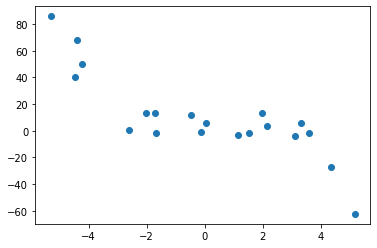

In [77]:
seed(1643)
npoints = 20
errs = randn(npoints) * 9
x = np.linspace(-5, 5, npoints) + randn(npoints) * 0.4
y = 1 + x + 0.6 * x ** 2 - 0.6 * x ** 3 + errs
plt.scatter(x, y)

## La regresión lineal

In [78]:
X = x.reshape(-1, 1) # De arreglo unidimensional a arreglo bidimensional

In [79]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
lm.intercept_, lm.coef_

(10.21356884651694, array([-8.32346925]))

In [81]:
# R2
lm.score(X, y)

0.6870167386354114

In [82]:
Xest = np.linspace(-6, 6, 100).reshape(-1, 1)
y_est = lm.predict(Xest)

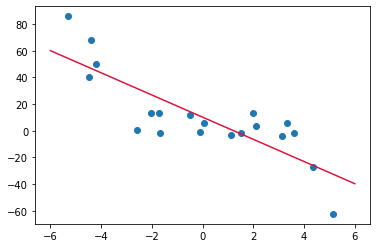

In [84]:
plt.scatter(x, y)
plt.plot(Xest, y_est, c="crimson")

## Regresion Lineal con polinomios

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(X)
X2 = poly.transform(X)

In [87]:
lm = LinearRegression()
lm.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
X2[:, 0]

array([-5.30150977, -4.4669251 , -4.21851094, -4.38096402, -2.59437225,
       -2.03155049, -1.70744779, -1.66656338, -0.11774344, -0.49089649,
        0.05042693,  1.12800308,  1.97219392,  1.52282785,  2.12393558,
        3.32234097,  3.11925144,  3.58927036,  4.35170161,  5.15091832])

In [89]:
Xest = np.linspace(-6, 6, 100).reshape(-1, 1)
Xest = poly.transform(Xest)

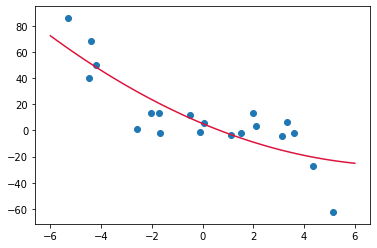

In [90]:
plt.plot(Xest[:, 0], lm.predict(Xest), c="crimson")
plt.scatter(X, y)

## Regresion Lineal con polinomios v2

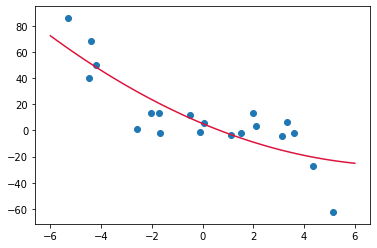

In [93]:
from sklearn.pipeline import Pipeline

pipe = Pipeline((
    ("poly", PolynomialFeatures(degree=2, include_bias=False)), # fit/transform
    ("model", LinearRegression()) # fit
))

pipe.fit(X, y)

Xest = np.linspace(-6, 6, 100).reshape(-1, 1)
yest = pipe.predict(Xest)
plt.plot(Xest, yest, c="crimson")
plt.scatter(X, y)

## Regresion Lineal con polinomios con overfitting

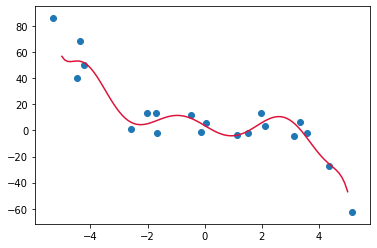

In [94]:
from sklearn.pipeline import Pipeline

pipe = Pipeline((
    ("poly", PolynomialFeatures(degree=9, include_bias=False)), # fit/transform
    ("model", LinearRegression()) # fit
))

pipe.fit(X, y)

Xest = np.linspace(-5, 5, 100).reshape(-1, 1)
yest = pipe.predict(Xest)
plt.plot(Xest, yest, c="crimson")
plt.scatter(X, y)

## Seleccionando el modelo optimo con cross-validation

In [96]:
from sklearn.model_selection import GridSearchCV

In [169]:
pipe = Pipeline((
    ("poly", PolynomialFeatures(degree=9, include_bias=False)), # fit/transform
    ("model", LinearRegression()) # fit
))

params = {"poly__degree": [1, 2, 3, 4, 5, 6, 7]}
gcv = GridSearchCV(pipe, params, return_train_score=True, cv=5, iid=True)

gcv.fit(X, y)

degs, cv_res, train_res = [], [], []
for deg, cv_score, train_score in zip(gcv.cv_results_["params"], gcv.cv_results_["mean_test_score"],
                      gcv.cv_results_["mean_train_score"]):
    degs.append(deg["poly__degree"])
    cv_res.append(cv_score)
    train_res.append(train_score)

In [166]:
gcv.best_params_

{'poly__degree': 3}

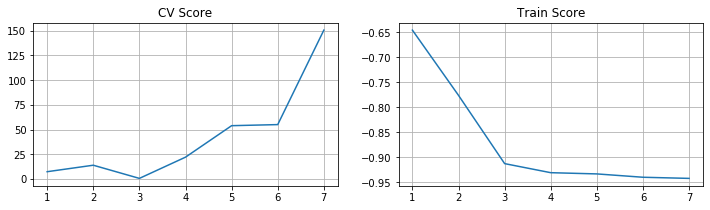

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].plot(degs, -np.array(cv_res))
ax[0].set_title("CV Score")
ax[1].plot(degs, -np.array(train_res))
ax[1].set_title("Train Score")
ax[0].grid()
ax[1].grid()